In [1]:
import pandas as pd
import os

In [2]:
data_path = "../../../agrivision_data/Agriculture-Vision"
classes = os.listdir(f"{data_path}/train/labels")
seed = 42

In [3]:
full_df = pd.read_csv("../../../agrivision_data/Agriculture-Vision/train_val_initial_2020-03-25.csv")
train_df = full_df[full_df["ds_part"] == 'train']
val_df = full_df[full_df["ds_part"] == 'val']

In [ ]:
val_df.to_csv('val_dumb_oversample.csv')

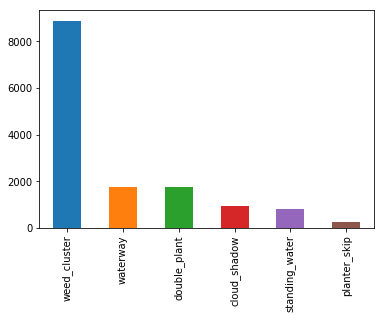

In [64]:
train_df[classes].astype(bool).sum().sort_values(ascending=False).plot.bar()

In [65]:
num_samples = val_df[classes].astype(bool).sum().sort_values(ascending=False)

In [66]:
num_samples

weed_cluster      3164
waterway           558
double_plant       442
standing_water     289
cloud_shadow       209
planter_skip        52
dtype: int64

In [67]:
amount_to_sample = num_samples.diff().cumsum().dropna().astype(int) * -1

In [68]:
amount_to_sample

waterway          2606
double_plant      2722
standing_water    2875
cloud_shadow      2955
planter_skip      3112
dtype: int64

In [69]:
sampled_items = []
for label, amount in amount_to_sample.items():
    sampled = train_df[train_df[label] > 0].sample(n=amount, replace=True)
    sampled_items.append(sampled)

In [70]:
sampled_items = pd.concat(sampled_items)

In [71]:
sampled_items

,double_plant,cloud_shadow,waterway,weed_cluster,planter_skip,standing_water,mask,boundary,combined_mask,id,name,field_id,ds_part,start_x,start_y,end_x,end_y
2569,12292.0,0.0,24200.0,11149.0,0.0,0.0,0,262144,0,NZ9MAMQG8_1984-6358-2496-6870,NZ9MAMQG8_1984-6358-2496-6870.jpg,NZ9MAMQG8,train,1984,6358,2496,6870
69,0.0,0.0,4875.0,0.0,0.0,0.0,0,123720,0,9YE827HFC_4601-2640-5113-3152,9YE827HFC_4601-2640-5113-3152.jpg,9YE827HFC,train,4601,2640,5113,3152
9769,0.0,0.0,9875.0,20221.0,0.0,0.0,262144,219937,219937,9BGMMWN3K_5899-6077-6411-6589,9BGMMWN3K_5899-6077-6411-6589.jpg,9BGMMWN3K,train,5899,6077,6411,6589
8866,0.0,0.0,10790.0,0.0,0.0,0.0,262144,194882,194882,KG7Y6Z6M4_5293-4659-5805-5171,KG7Y6Z6M4_5293-4659-5805-5171.jpg,KG7Y6Z6M4,train,5293,4659,5805,5171
989,0.0,0.0,69500.0,1103.0,0.0,0.0,0,222234,0,4KTMNU1T3_968-6465-1480-6977,4KTMNU1T3_968-6465-1480-6977.jpg,4KTMNU1T3,train,968,6465,1480,6977
6726,0.0,0.0,16518.0,5237.0,0.0,0.0,0,262144,0,HBF8Y3DJW_1506-7953-2018-8465,HBF8Y3DJW_1506-7953-2018-8465.jpg,HBF8Y3DJW,train,1506,7953,2018,8465
4966,0.0,0.0,10111.0,82379.0,0.0,0.0,0,198948,0,2PJHLLWTV_973-4433-1485-4945,2PJHLLWTV_973-4433-1485-4945.jpg,2PJHLLWTV,train,973,4433,1485,4945
2736,0.0,0.0,10001.0,0.0,0.0,0.0,0,229829,0,BWR67YGTX_800-4624-1312-5136,BWR67YGTX_800-4624-1312-5136.jpg,BWR67YGTX,train,800,4624,1312,5136
2229,21636.0,0.0,2850.0,0.0,0.0,0.0,0,242021,0,GU71M6KBB_2206-1884-2718-2396,GU71M6KBB_2206-1884-2718-2396.jpg,GU71M6KBB,train,2206,1884,2718,2396
6393,0.0,0.0,50714.0,0.0,0.0,0.0,0,181274,0,42DT9R2QN_671-6416-1183-6928,42DT9R2QN_671-6416-1183-6928.jpg,42DT9R2QN,train,671,6416,1183,6928


In [72]:
train_df = pd.concat([train_df, sampled_items])

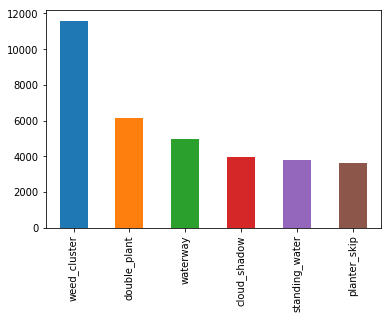

In [73]:
train_df[classes].astype(bool).sum().sort_values(ascending=False).plot.bar()

In [74]:
train_df

,double_plant,cloud_shadow,waterway,weed_cluster,planter_skip,standing_water,mask,boundary,combined_mask,id,name,field_id,ds_part,start_x,start_y,end_x,end_y
0,0.0,0.0,0.0,174211.0,0.0,0.0,0,262144,0,WJZJEE14I_2314-4165-2826-4677,WJZJEE14I_2314-4165-2826-4677.jpg,WJZJEE14I,train,2314,4165,2826,4677
1,0.0,0.0,0.0,35362.0,0.0,0.0,0,226182,0,XD6GQK3HF_1013-830-1525-1342,XD6GQK3HF_1013-830-1525-1342.jpg,XD6GQK3HF,train,1013,830,1525,1342
2,0.0,0.0,0.0,2524.0,0.0,0.0,0,166559,0,91MB8NI61_1538-3232-2050-3744,91MB8NI61_1538-3232-2050-3744.jpg,91MB8NI61,train,1538,3232,2050,3744
3,0.0,0.0,38693.0,0.0,0.0,0.0,0,262144,0,VLABVAH3T_8392-7406-8904-7918,VLABVAH3T_8392-7406-8904-7918.jpg,VLABVAH3T,train,8392,7406,8904,7918
4,0.0,205743.0,0.0,0.0,0.0,0.0,0,223071,0,393VYUQ83_2365-3624-2877-4136,393VYUQ83_2365-3624-2877-4136.jpg,393VYUQ83,train,2365,3624,2877,4136
5,22708.0,0.0,0.0,24851.0,0.0,0.0,0,262144,0,T89JYE12U_9090-832-9602-1344,T89JYE12U_9090-832-9602-1344.jpg,T89JYE12U,train,9090,832,9602,1344
6,0.0,0.0,0.0,5726.0,0.0,0.0,0,141389,0,24M49T6CC_8888-561-9400-1073,24M49T6CC_8888-561-9400-1073.jpg,24M49T6CC,train,8888,561,9400,1073
7,0.0,0.0,0.0,9081.0,0.0,0.0,0,204888,0,J4IXXECHN_754-2319-1266-2831,J4IXXECHN_754-2319-1266-2831.jpg,J4IXXECHN,train,754,2319,1266,2831
8,0.0,0.0,0.0,84193.0,0.0,0.0,0,212736,0,KVQI28WTL_2363-2165-2875-2677,KVQI28WTL_2363-2165-2875-2677.jpg,KVQI28WTL,train,2363,2165,2875,2677
9,0.0,0.0,0.0,28810.0,0.0,0.0,0,262144,0,F2JPFEHLL_1732-5798-2244-6310,F2JPFEHLL_1732-5798-2244-6310.jpg,F2JPFEHLL,train,1732,5798,2244,6310


In [75]:
train_df.to_csv('train_dumb_oversample.csv')